In [2]:
# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 📥 Step 2: Load Dataset
file_path = r"D:\SQL projects\House Price Prediction using Supervised Machine Learning\house_price_sample.xlsx"
df = pd.read_excel(file_path)

print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (500, 10)
   LotArea  YearBuilt  BedroomAbvGr  GarageArea  GrLivArea  FullBath  \
0     6619       1960             4         699       1284         1   
1    13512       2005             4         772        921         3   
2     6342       2016             2         337        924         1   
3     7832       1978             1         249       2372         2   
4     7824       1958             2         453        969         3   

   HalfBath  OverallQual Neighborhood  SalePrice  
0         1            2      CollgCr     313363  
1         1            1      OldTown     123382  
2         0            9      OldTown     346375  
3         1            2      Somerst     287135  
4         1            8      OldTown     253466  


In [5]:
# 🎯 Step 3: Target and Feature Understanding
# Our target variable is 'SalePrice'

# 🧹 Step 4: Clean Data (no missing values in this sample, but safe to check)
df.isnull().sum()

LotArea         0
YearBuilt       0
BedroomAbvGr    0
GarageArea      0
GrLivArea       0
FullBath        0
HalfBath        0
OverallQual     0
Neighborhood    0
SalePrice       0
dtype: int64

In [6]:
# 🎭 Step 5: Encode Categorical Column ('Neighborhood')
label_enc = LabelEncoder()
df['Neighborhood'] = label_enc.fit_transform(df['Neighborhood'])

In [7]:
# 🏗️ Step 6: Split Features and Target
X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

In [8]:
# ✂️ Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# 🧠 Step 8: Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


In [10]:
# 🌳 Step 9: Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [11]:
# 📏 Step 10: Evaluate Both Models
def evaluate_model(name, y_true, y_pred):
    print(f"\n🔍 {name} Evaluation:")
    print("R² Score:", r2_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)


🔍 Linear Regression Evaluation:
R² Score: -0.04943373911568294
MAE: 86483.30158668729
RMSE: 100146.71579998983

🔍 Random Forest Evaluation:
R² Score: -0.30747031154168014
MAE: 95495.93389999999
RMSE: 111782.83464528646


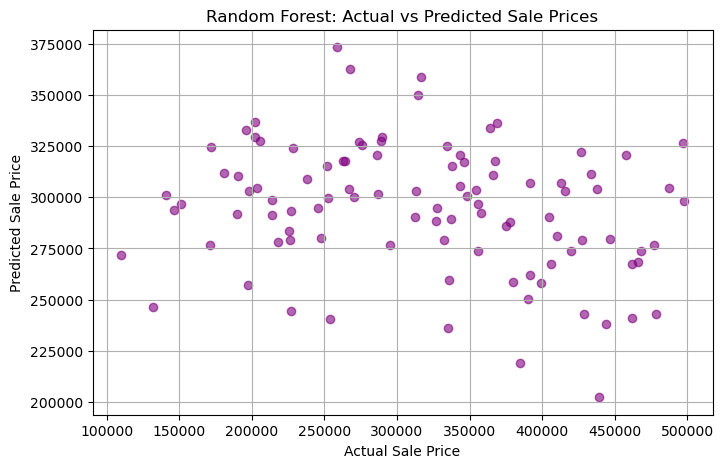

In [12]:
# 📊 Step 11: Plot Predictions
# Plot 1 - Actual vs Predicted (Random Forest)
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='purple')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Random Forest: Actual vs Predicted Sale Prices")
plt.grid(True)
plt.show()

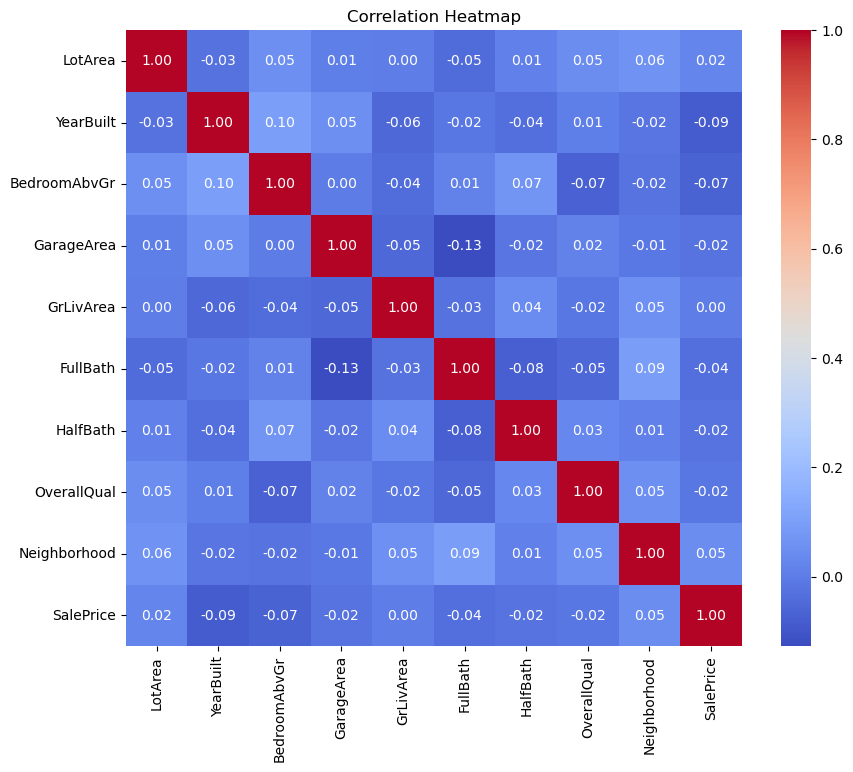

In [15]:
# 📈 Plot 2: Correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()


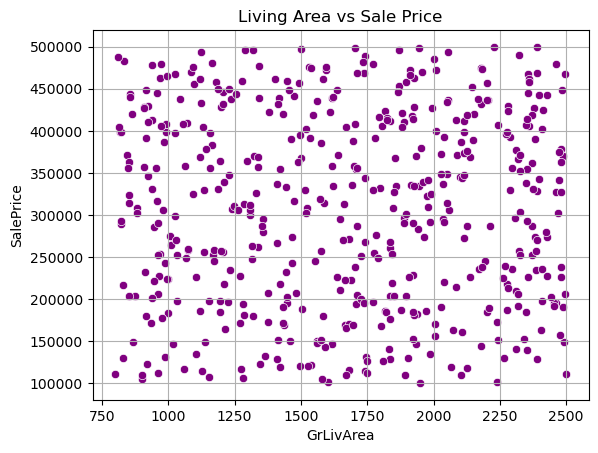

In [16]:
# 📈 Plot 3: GrLivArea vs SalePrice
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df, color='purple')
plt.title("Living Area vs Sale Price")
plt.grid(True)
plt.show()

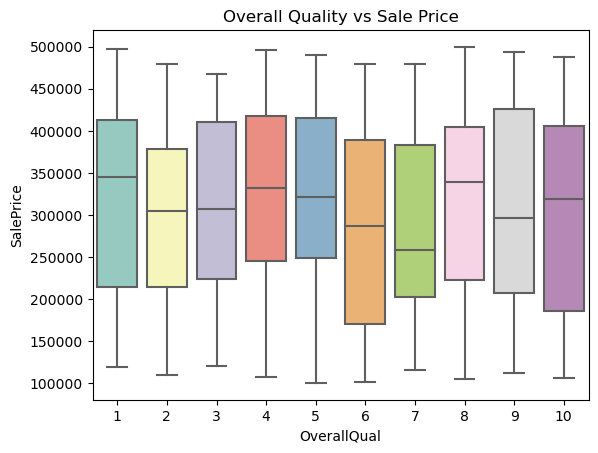

In [17]:
# 📈 Plot 4: OverallQual vs SalePrice
sns.boxplot(x='OverallQual', y='SalePrice', data=df, palette='Set3')
plt.title("Overall Quality vs Sale Price")
plt.show()

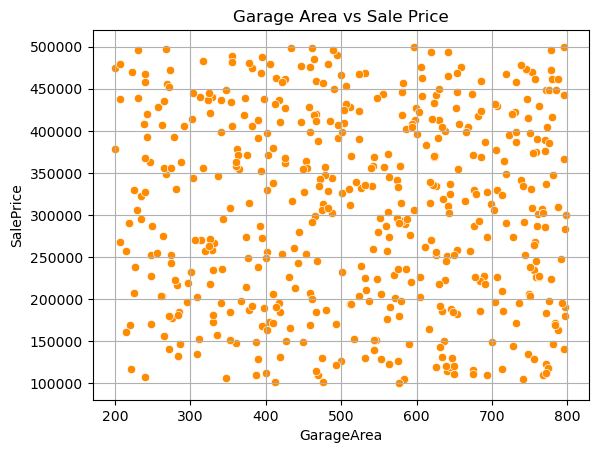

In [18]:
# 📈 Plot 5: GarageArea vs SalePrice
sns.scatterplot(x='GarageArea', y='SalePrice', data=df, color='darkorange')
plt.title("Garage Area vs Sale Price")
plt.grid(True)
plt.show()
